# Feature Selection & Feature Extraction

Feature selection and feature extraction are two techniques used in machine learning and data analysis to improve the performance and efficiency of models by reducing the dimensionality of the input data while retaining relevant information.

1. **Feature Selection**:
Feature selection involves selecting a subset of the most important features (variables) from the original set of features. The goal is to remove irrelevant or redundant features, which can lead to improved model performance, reduced complexity, and faster training times. By eliminating irrelevant features, the model becomes less prone to overfitting and generalizes better to new, unseen data.

    There are several methods for feature selection, including:

    - **Filter Methods**: These methods use statistical measures (e.g., correlation, mutual information) to rank and select features based on their individual characteristics, without considering the model being used.
  
    - **Wrapper Methods**: These methods involve training and evaluating the model using different subsets of features. Common techniques like forward selection, backward elimination, and recursive feature elimination fall under this category.
  
    - **Embedded Methods**: These methods incorporate feature selection into the model training process itself. Regularization techniques like Lasso (L1 regularization) can automatically shrink the coefficients of less important features to zero, effectively eliminating them.

2. **Feature Extraction**:
Feature extraction involves transforming the original features into a new set of features through various mathematical or statistical techniques. The objective is to capture the essential information in a more compact representation. This is particularly useful when dealing with high-dimensional data or when the original features might not be well-suited for the model.

    Principal Component Analysis (PCA) is a classic example of feature extraction. It's a dimensionality reduction technique that transforms the data into a new set of orthogonal variables (principal components) that capture the most significant variations in the data. Other techniques like t-SNE (t-distributed Stochastic Neighbor Embedding) are often used for visualizing high-dimensional data in a lower-dimensional space.

    Another popular form of feature extraction is using deep learning models like autoencoders. Autoencoders are neural networks designed to learn efficient representations of the input data by encoding it into a lower-dimensional latent space and then decoding it back to the original space. This process can effectively capture important features while reducing noise and irrelevant information.

In summary, both feature selection and feature extraction are used to reduce the dimensionality of data and enhance the performance of machine learning models. Feature selection involves choosing a subset of the original features, while feature extraction involves creating new, derived features. The choice between the two depends on the nature of the data, the problem at hand, and the specific goals of the analysis.

# Image Segmentation

In [2]:
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import opencv_jupyter_ui as jcv

In [1]:
pip install opencv_jupyter_ui


     ---------------------------------------- 0.0/255.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/255.7 kB 991.0 kB/s eta 0:00:01
     --------- ----------------------------- 61.4/255.7 kB 1.1 MB/s eta 0:00:01
     --------------- -------------------- 112.6/255.7 kB 819.2 kB/s eta 0:00:01
     --------------- -------------------- 112.6/255.7 kB 819.2 kB/s eta 0:00:01
     --------------- -------------------- 112.6/255.7 kB 819.2 kB/s eta 0:00:01
     ----------------- ------------------ 122.9/255.7 kB 481.4 kB/s eta 0:00:01
     ------------------------------------ 255.7/255.7 kB 786.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Image Thresholding

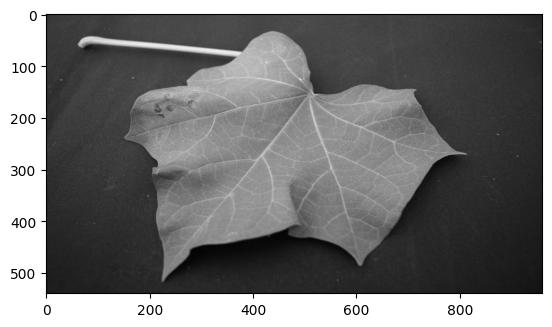

In [88]:
# load image
img = cv.resize(cv.imread("images for segmentation/DSC_0161.JPG", 0), (960, 540))
# img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow("Leaf", img)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(img, 'gray')

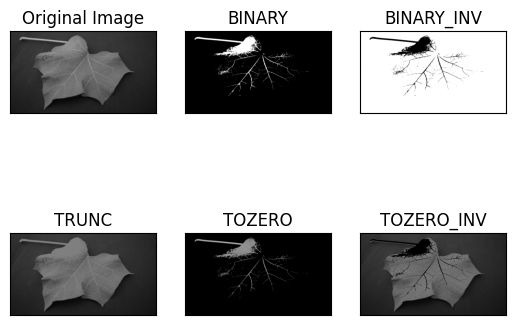

In [89]:
# Simple Thresholding
_, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
_, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
_, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

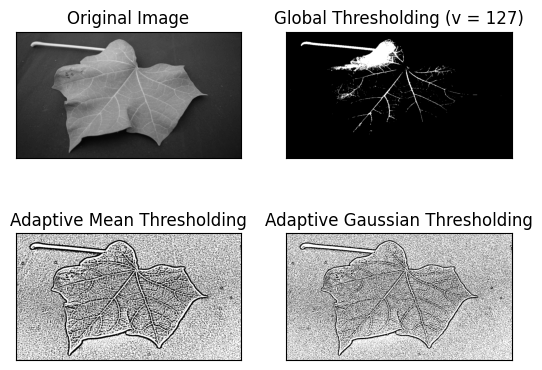

In [90]:
# Adaptive Thresholding
thresh1Adpt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
thresh2Adpt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, thresh1, thresh1Adpt, thresh2Adpt]

for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

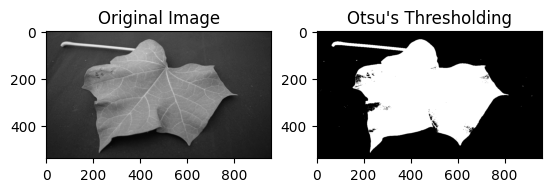

In [91]:
# Otsu's Binarization 
_, th = cv.threshold(img, 127, 225, cv.THRESH_OTSU)
# plt.imshow(th)
plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.title("Original Image")
plt.subplot(1,2,2),plt.imshow(th,'gray')
plt.title("Otsu's Thresholding")
plt.show()

In simple Thresholding for every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function `cv.threshold` is used to apply the thresholding.
OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type `cv.THRESH_BINARY`. All simple thresholding types are:

- **cv.THRESH_BINARY**
- **cv.THRESH_BINARY_INV**
- **cv.THRESH_TRUNC**
- **cv.THRESH_TOZERO**
- **cv.THRESH_TOZERO_INV**

  

The adaptiveMethod decides how the threshold value is calculated:

- **cv.ADAPTIVE_THRESH_MEAN_C**: The threshold value is the mean of the neighbourhood area minus the constant C.
- **cv.ADAPTIVE_THRESH_GAUSSIAN_C**: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

  
In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

## Region based image segmentation

## Region-based segmentation using the split and merge
Region-based segmentation using the split and merge technique involves recursively dividing an image into smaller regions and then merging regions that share similar characteristics. 

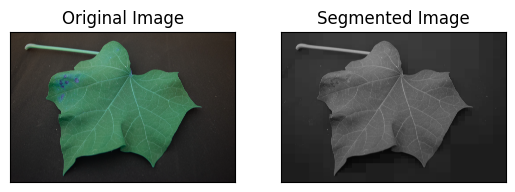

In [130]:
image = cv.imread("images for segmentation/DSC_0161.JPG")

threshold = 30 # Define the threshold for splitting and merging (adjust as needed)
min_region_size = 100 # Define the minimum region size (adjust as needed)

def split_and_merge(image, x1, y1, x2, y2):
    region = image[y1:y2, x1:x2]
    mean_value = np.mean(region)

    if x2 - x1 <= 1 or y2 - y1 <= 1 or abs(region - mean_value).max() < threshold:
        return np.full_like(region, mean_value)

    else:
        x_middle = (x1 + x2) // 2
        y_middle = (y1 + y2) // 2

        upper_left = split_and_merge(image, x1, y1, x_middle, y_middle)
        upper_right = split_and_merge(image, x_middle, y1, x2, y_middle)
        lower_left = split_and_merge(image, x1, y_middle, x_middle, y2)
        lower_right = split_and_merge(image, x_middle, y_middle, x2, y2)

        return np.vstack((np.hstack((upper_left, upper_right)), np.hstack((lower_left, lower_right))))

# Apply split and merge segmentation
segmented_image = split_and_merge(image, 0, 0, image.shape[1], image.shape[0])

plt.subplot(1,2,1),plt.imshow(image3)
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.xticks([]),plt.yticks([])

plt.show()

### Region Growing image segmentation

Region growing segmentation is a simple image segmentation technique where pixels are grouped together based on similarity criteria. Here's a basic explanation of the region growing algorithm along with a Python code example using the OpenCV library:

Algorithm Steps:
1. Choose a seed pixel (starting point) from which to grow the region.
2. Define a similarity criterion or threshold that determines which neighboring pixels can be added to the region.
3. Initialize an empty region and a queue to store neighboring pixels.
4. Add the seed pixel to the region and enqueue its neighbors that meet the similarity criterion.
5. Dequeue pixels from the queue and add them to the region while enqueuing their eligible neighbors.
6. Repeat step 5 until the queue is empty or no more pixels can be added to the region.

In [131]:
def region_growing(image, seed):
    rows, cols = image.shape
    visited = np.zeros_like(image)
    region = np.zeros_like(image)
    queue = []

    # Define similarity threshold (adjust as needed)
    threshold = 30

    queue.append(seed)
    visited[seed] = 1
    region[seed] = image[seed]

    while queue:
        current_pixel = queue.pop(0)
        neighbors = get_neighbors(current_pixel, rows, cols)
        
        for neighbor in neighbors:
            if not visited[neighbor]:
                if abs(int(image[neighbor]) - int(image[current_pixel])) <= threshold:
                    region[neighbor] = image[neighbor]
                    visited[neighbor] = 1
                    queue.append(neighbor)

    return region

def get_neighbors(pixel, rows, cols):
    neighbors = []
    row, col = pixel
    if row > 0:
        neighbors.append((row - 1, col))
    if row < rows - 1:
        neighbors.append((row + 1, col))
    if col > 0:
        neighbors.append((row, col - 1))
    if col < cols - 1:
        neighbors.append((row, col + 1))
    return neighbors

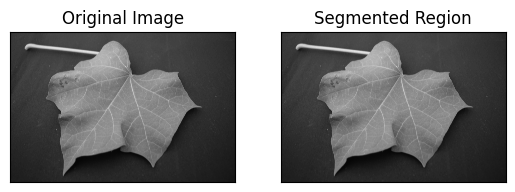

In [132]:
image = cv.imread("images for segmentation/DSC_0161.JPG", 0)
seed_pixel = (100, 100)

# Apply region growing segmentation
segmented_region = region_growing(image, seed_pixel)

plt.subplot(2,2,1),plt.imshow(image,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(segmented_region,'gray')
plt.title('Segmented Region')
plt.xticks([]),plt.yticks([])

plt.show()

## Edge-based detection

Edge-based image segmentation is a technique that involves detecting edges in an image to identify boundaries between different regions or objects. One common method for edge detection is the Canny edge detection algorithm.

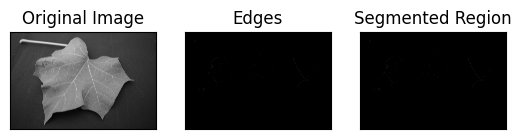

In [133]:
# Canny edge detection
'''The Canny edge detection algorithm is a multi-step process that aims to detect the edges in an image while minimizing noise and producing thin, well-defined edges. '''

image2 = cv.imread("images for segmentation/DSC_0161.JPG", 0)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv.GaussianBlur(image2, (5, 5), 0)
# Perform Canny edge detection
edges = cv.Canny(blurred, threshold1=100, threshold2=70)
# Find contours in the edge image
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a black image to draw the segmented regions
segmented_regions2 = np.zeros_like(image2)
# Draw the detected contours on the segmented image
cv.drawContours(segmented_regions2, contours, -1, 255, thickness=cv.FILLED)

plt.subplot(1,3,1),plt.imshow(image2,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges,'gray')
plt.title('Edges')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(segmented_regions2,'gray')
plt.title('Segmented Region')
plt.xticks([]),plt.yticks([])

plt.show()

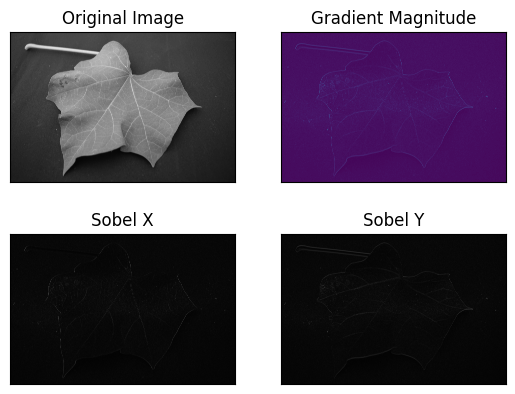

In [134]:
# Sobel edge detection
'''The Sobel edge detection algorithm calculates the gradient magnitude in an image to highlight areas of rapid intensity changes, which often correspond to edges. The algorithm uses two filters (kernels) to compute the gradients in the x and y directions. The gradient magnitude is then calculated by combining the two directional gradients.'''

# Apply Sobel edge detection in the x and y directions
sobel_x = cv.Sobel(image2, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image2, cv.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of gradients
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the gradient magnitude for visualization
gradient_magnitude = cv.normalize(gradient_magnitude, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)


plt.subplot(2,2,1),plt.imshow(image2,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(gradient_magnitude)
plt.title('Gradient Magnitude')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(np.uint8(np.absolute(sobel_x)),'gray')
plt.title('Sobel X')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(np.uint8(np.absolute(sobel_y)),'gray')
plt.title('Sobel Y')
plt.xticks([]),plt.yticks([])

plt.show()


## Clustering

Cluster-based image segmentation involves grouping pixels with similar characteristics into clusters, which can represent distinct regions or objects in the image. K-means clustering is a commonly used algorithm for this purpose.

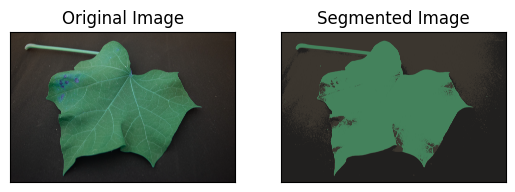

In [137]:
#K-means clustering
image3 = cv.imread("images for segmentation/DSC_0161.JPG")

# Reshape the image to a 2D array of pixels and 3 color channels
pixels = image3.reshape((-1, 3))

# Convert the pixel values to float32 for K-means
pixels = np.float32(pixels)

# Define the criteria for K-means (maximum number of iterations and epsilon)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Specify the number of clusters (adjust as needed)
num_clusters = 3

# Perform K-means clustering
_, labels, centers = cv.kmeans(pixels, num_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the center values back to uint8
centers = np.uint8(centers)

# Map the labels to the center values
segmented_image = centers[labels.flatten()]

# Reshape the segmented image back to the original shape
segmented_image = segmented_image.reshape(image3.shape)

plt.subplot(1,2,1),plt.imshow(image3,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.xticks([]),plt.yticks([])

plt.show()


## Artificial Neural Network Based Image Segmentation

Artificial Neural Networks (ANNs) can also be used for image segmentation, particularly in the context of semantic segmentation. Semantic segmentation involves classifying each pixel in an image into predefined categories (classes). Convolutional Neural Networks (CNNs) are commonly used for this purpose due to their ability to capture spatial information.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load the image
image4 = cv.imread("images for segmentation/DSC_0161.JPG")
image4 = cv.cvtColor(image4, cv.COLOR_BGR2RGB)
image4 = image4 / 255.0  # Normalize pixel values to [0, 1]

# Create a simple U-Net architecture for segmentation
def create_unet(input_shape, num_classes):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    up1 = UpSampling2D(size=(2, 2))(conv3)
    up1 = Conv2D(64, (2, 2), activation='relu', padding='same')(up1)
    merge1 = conv2 + up1

    up2 = UpSampling2D(size=(2, 2))(merge1)
    up2 = Conv2D(32, (2, 2), activation='relu', padding='same')(up2)
    merge2 = conv1 + up2

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(merge2)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the U-Net model
input_shape = image4.shape[:2] + (3,)  # Adding color channels
num_classes = 2  # Number of segmentation classes (background and object)
model = create_unet(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the image for prediction
input_image = cv.resize(image4, input_shape[:2][::-1])
input_image = np.expand_dims(input_image, axis=0)

# Perform segmentation
segmentation = model.predict(input_image)

# Display the original image and the segmented output
# cv2.imshow('Original Image', image)
# cv2.imshow('Segmentation', segmentation[0, ..., 1])  # Display only object class probability
# cv2.waitKey(0)
# cv2.destroyAllWindows()


plt.subplot(1,2,1),plt.imshow(image4,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(segmentation)
plt.title('Segmented Image')
plt.xticks([]),plt.yticks([])

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess image and corresponding labels
image = cv.imread("DSC_0161.JPG")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv.resize(image, (256, 256))
image = image / 255.0

# Generate synthetic labels (for demonstration purposes)
labels = np.zeros_like(image)
labels[100:150, 100:150, :] = [1, 0, 0]  # Red region
labels[50:100, 200:250, :] = [0, 1, 0]  # Green region

# Define a simple FCN model
model = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(3, (1, 1), activation='softmax', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (use actual labeled data for real-world applications)
model.fit(image[np.newaxis, ...], labels[np.newaxis, ...], epochs=10, batch_size=1)

# Perform segmentation using the trained model
segmentation_result = model.predict(image[np.newaxis, ...])

# Display the original image, ground truth labels, and segmentation result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(labels)
plt.title("Ground Truth Labels")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmentation_result[0])
plt.title("Segmentation Result")
plt.axis('off')

plt.tight_layout()
plt.show()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
